In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
answers=pd.read_csv(os.path.join(path, 'Achievement 1', 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [4]:
answers.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [5]:
answers=answers.drop(['DATE'], axis=1)

In [6]:
y=answers

In [7]:
X=pd.read_csv(os.path.join(path, 'Achievement 2', 'Data Sets', 'unscaled_cleaned.csv'), index_col=False)
X

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0      ...                 4.9                     5               0.88   
1      ...                 5.0                     7               0.91   
2      ...                 4.1                     7               0.91   
3      ...                 2.3                     7               0.86   
4      ...                 4.3                     3               0.80   
...    ...                 ...                   ...                ...   
22945  ...                14.2                     5               0.82   
22946  ...                14.3                     5               0.82   
22947  ...                14.4                     5               0.82   
22948  ...                12.4                     5               0.82   
22949  ...                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142      

In [8]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [9]:
X = X.reshape(-1,15,9)

In [10]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212, 15)
(5738, 15, 9) (5738, 15)


# Creating Keras model- 1st iteration

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Define timesteps, input_dim, and n_classes based on the data shapes
timesteps = X_train.shape[1]  # The number of timesteps in each sequence
input_dim = X_train.shape[2]  # The number of features in each timestep
n_classes = y_train.shape[1]  # Number of classes in one-hot encoded y_train

# Parameters
epochs = 50
batch_size = 32
n_filters = 64  # Number of filters in Conv1D layers

# Define the model
model = Sequential()
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(n_filters * 2, kernel_size=2, activation='relu'))  # Reduced kernel size
model.add(BatchNormalization())
model.add(Flatten())  # Flattening to connect to Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))  # Final layer for classification

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional, for reference)
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1052 - loss: 17.8275 - val_accuracy: 0.1136 - val_loss: 30.7769
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1106 - loss: 68.7575 - val_accuracy: 0.0878 - val_loss: 65.4601
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1014 - loss: 134.0070 - val_accuracy: 0.0842 - val_loss: 107.4903
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0982 - loss: 210.7501 - val_accuracy: 0.0809 - val_loss: 158.2627
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0976 - loss: 292.0844 - val_accuracy: 0.0803 - val_loss: 183.2009
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0949 - loss: 376.2378 - val_accuracy: 0.0807 - val_loss: 249.3591
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0972 - loss: 482.1478 - val_accuracy: 0.0800 - val_loss: 293.8661
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0994 - loss: 5

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 13, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 4, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,600 (615.63 KB)

 Trainable params: 78,479 (306.56 KB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 78,481 (306.57 KB)

In [22]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

In [23]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [24]:
# Evaluate

print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pred        BASEL  BELGRADE  BUDAPEST  DUSSELDORF  LJUBLJANA  MADRID  \
True                                                                   
BASEL           7       159         8           2         15    3489   
BELGRADE        4       191         2           3          2     889   
BUDAPEST        0        26         0           1          3     183   
DEBILT          0         6         1           0          0      74   
DUSSELDORF      0         4         0           1          0      24   
HEATHROW        1         7         1           0          0      73   
KASSEL          0         4         0           0          0       7   
LJUBLJANA       0         3         0           0          0      57   
MAASTRICHT      0         0         0           0          0       8   
MADRID          0         4         0           0          1     453   
MUNCHENB        0         0         0           0          0       8   
OSLO            0      

# 2nd iteration- reduced learning rate and reduced model complexity

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Parameters
epochs = 50
batch_size = 32
n_filters = 32  # Reduced number of filters in Conv1D layers
learning_rate = 1e-5  # Lower learning rate for stability

# Define the model
model = Sequential()
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())  # Flattening to connect to Dense layers
model.add(Dense(64, activation='relu'))  # Reduced dense layer units
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))  # Final layer for classification

# Compile the model with the lower learning rate
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional, for reference)
model.summary()


Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0287 - loss: 11.4379 - val_accuracy: 0.0444 - val_loss: 9.2761
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0446 - loss: 10.8649 - val_accuracy: 0.0701 - val_loss: 9.2204
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0662 - loss: 11.1914 - val_accuracy: 0.0843 - val_loss: 9.6417
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0837 - loss: 12.8275 - val_accuracy: 0.0880 - val_loss: 10.4593
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0879 - loss: 15.0366 - val_accuracy: 0.0807 - val_loss: 11.7149
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0893 - loss: 17.8664 - val_accuracy: 0.0793 - val_loss: 13.4185
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0814 - loss: 20.2938 - val_accuracy: 0.0817 - val_loss: 15.0064
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0822 - loss: 24.0741 - val_

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,248 (129.88 KB)

 Trainable params: 16,527 (64.56 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 16,529 (64.57 KB)

# 3rd iteration- fully connected neural network (MLP)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Parameters
epochs = 50
batch_size = 32
learning_rate = 1e-6  # Further reduced learning rate for stability

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(timesteps, input_dim)))  # Flatten the input for Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model with the lower learning rate
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional, for reference)
model.summary()


Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1021 - loss: 110.0205 - val_accuracy: 0.0500 - val_loss: 88.1726
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1042 - loss: 109.6921 - val_accuracy: 0.0573 - val_loss: 85.2877
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1027 - loss: 106.0799 - val_accuracy: 0.0638 - val_loss: 82.5930
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1058 - loss: 104.5935 - val_accuracy: 0.0692 - val_loss: 80.0207
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1071 - loss: 103.1729 - val_accuracy: 0.0758 - val_loss: 77.5386
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1054 - loss: 100.4010 - val_accuracy: 0.0798 - val_loss: 75.2521
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1098 - loss: 98.2181 - val_accuracy: 0.0852 - val_loss: 73.0255
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1076 - loss: 95.20

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 135)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,280 (208.13 KB)

 Trainable params: 26,639 (104.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,641 (104.07 KB)

# 4th iteration- deeper CNN with progressive filter expansion

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Parameters
epochs = 50
batch_size = 32
n_filters = 32  # Start with fewer filters in the initial layer
learning_rate = 1e-5

# Define the model
model = Sequential()
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Add more convolutional layers with increasing filters
model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# Final Conv1D layer with a smaller kernel size to avoid negative dimensions
model.add(Conv1D(n_filters * 4, kernel_size=2, activation='relu'))
model.add(BatchNormalization())

# Flatten and add dense layers for classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional)
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0915 - loss: 10.3835 - val_accuracy: 0.1229 - val_loss: 9.5162
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0998 - loss: 11.0719 - val_accuracy: 0.1223 - val_loss: 10.8652
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0959 - loss: 13.0406 - val_accuracy: 0.1131 - val_loss: 12.1228
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0902 - loss: 15.6421 - val_accuracy: 0.0986 - val_loss: 13.8705
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0847 - loss: 19.1049 - val_accuracy: 0.0983 - val_loss: 15.9696
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0815 - loss: 23.3038 - val_accuracy: 0.0953 - val_loss: 18.6154
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0817 - loss: 27.9621 - val_accuracy: 0.0927 - val_loss: 21.8824
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0799 - loss: 32.6281 - va

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)              │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 1, 128)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,472 (333.88 KB)

 Trainable params: 42,511 (166.06 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 42,513 (166.07 KB)

# 5th iteration- hybrid CNN-RNN

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Parameters
epochs = 50
batch_size = 32
n_filters = 32  # Number of filters for Conv1D layers
learning_rate = 1e-5

# Define the hybrid CNN-LSTM model
model = Sequential()
# CNN layers for feature extraction
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# LSTM layer to capture temporal dependencies
model.add(LSTM(64, return_sequences=False))  # Set return_sequences=False since we’re going to dense layers next

# Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional)
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1033 - loss: 8.8272 - val_accuracy: 0.1612 - val_loss: 8.5566
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1192 - loss: 8.7975 - val_accuracy: 0.1718 - val_loss: 8.5144
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1161 - loss: 8.8491 - val_accuracy: 0.0831 - val_loss: 8.6718
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1075 - loss: 9.4537 - val_accuracy: 0.0735 - val_loss: 9.2127
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1021 - loss: 10.4828 - val_accuracy: 0.0783 - val_loss: 10.2333
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1030 - loss: 12.1525 - val_accuracy: 0.0796 - val_loss: 11.6735
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0996 - loss: 14.3569 - val_accuracy: 0.0796 - val_loss: 13.4458
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1009 - loss: 16.3984 - val_accur

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)              │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_24 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,344 (395.88 KB)

 Trainable params: 50,575 (197.56 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 50,577 (197.57 KB)

In [31]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'

}

In [32]:
def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([stations[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([stations[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

In [33]:
# Evaluate

print(confusion_matrix(y_test, model.predict(X_test)))

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  KASSEL  \
True                                                                          
BASEL         611         1        43       2          11       235      90   
BELGRADE      272         3         0       0           4       161      12   
BUDAPEST       39         0         0       0           0        25       1   
DEBILT         18         0         0       0           0        14       0   
DUSSELDORF      3         0         0       0           0         4       0   
HEATHROW       12         0         0       0           0         5       0   
KASSEL          3         0         0       0           0         1       0   
LJUBLJANA      14         0         0       0           0         2       0   
MAASTRICHT      0         0         0       0           0         0       1   
MADRID         26         2         0       0           2         9       4   
MUNCHENB   

# 6th iteration hybrid CNN-RNN with HP adjustments

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, GRU, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

# Parameters
epochs = 50
batch_size = 32
n_filters = 32  # Start with fewer filters in the initial layer
learning_rate = 1e-6  # Further reduced learning rate

# Define the hybrid CNN-GRU model
model = Sequential()
# CNN layers for feature extraction
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

# GRU layer to capture temporal dependencies
model.add(GRU(128, return_sequences=False))  # Increased units to 128 for more capacity

# Dense layers for classification
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))  # L2 regularization added
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))  # Additional dense layer
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model summary (optional)
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.0355 - loss: 11.0093 - val_accuracy: 0.0268 - val_loss: 10.7313
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0325 - loss: 10.8303 - val_accuracy: 0.0307 - val_loss: 10.7094
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0369 - loss: 10.8891 - val_accuracy: 0.0357 - val_loss: 10.6916
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0373 - loss: 10.9045 - val_accuracy: 0.0404 - val_loss: 10.6764
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0394 - loss: 10.8368 - val_accuracy: 0.0472 - val_loss: 10.6645
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0420 - loss: 10.8616 - val_accuracy: 0.0533 - val_loss: 10.6565
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0394 - loss: 10.9075 - val_accuracy: 0.0620 - val_loss: 10.6570
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0502 - loss: 11.0093 - v

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 13, 32)         │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 13, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_22 (MaxPooling1D) │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 4, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_23 (MaxPooling1D) │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,264 (840.88 KB)

 Trainable params: 107,535 (420.06 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 107,537 (420.07 KB)

# 7th iteration (1st one post-instructor feedback): learning rate of 0.0005 and class weight application

In [22]:
# Check the type, shape, and unique values of y_train
print("Data type of y_train:", type(y_train))
print("Shape of y_train:", y_train.shape)
print("First few elements of y_train:", y_train[:5])

# Attempt to flatten and convert y_train to integer labels
y_train_labels = y_train.ravel().astype(int)  # Flatten and ensure it's integer
print("Shape of y_train_labels after flattening:", y_train_labels.shape)
print("Unique labels in y_train_labels:", np.unique(y_train_labels))

Data type of y_train: <class 'numpy.ndarray'>
Shape of y_train: (17212, 15)
First few elements of y_train: [[0 1 1 1 1 0 1 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Shape of y_train_labels after flattening: (258180,)
Unique labels in y_train_labels: [0 1]


In [23]:
# Convert one-hot encoded y_train to integer class labels
y_train_labels = np.argmax(y_train, axis=1)  # Gets the index of the max value along axis 1

# Check the new y_train_labels
print("Shape of y_train_labels:", y_train_labels.shape)
print("Unique labels in y_train_labels:", np.unique(y_train_labels))

# Define classes as unique labels
classes = list(np.unique(y_train_labels))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))

Shape of y_train_labels: (17212,)
Unique labels in y_train_labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [30]:
# Define classes as unique labels from y_train_labels
classes = list(np.unique(y_train_labels))

# Compute class weights
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))

In [31]:
import tensorflow as tf
import numpy as np
import random

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Ensure the correct number of classes
n_classes = 15  # Explicitly set this to 15, as we have classes from 0 to 14

# Define the model with the corrected number of output units
model = Sequential()
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(n_filters * 4, kernel_size=2, activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))  # Set the number of units to 15

# Compile and train as before
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_labels, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, np.argmax(y_test, axis=1)), class_weight=class_weights_dict, 
                    callbacks=[early_stopping])

# Evaluate model performance on the validation set
validation_loss, validation_accuracy = model.evaluate(X_test, np.argmax(y_test, axis=1))
print(f"Validation Loss: {validation_loss}, Validation Accuracy: {validation_accuracy}")

# Optional: Display model summary
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2933 - loss: 2.7589 - val_accuracy: 0.5530 - val_loss: 1.2064
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4857 - loss: 2.5092 - val_accuracy: 0.5228 - val_loss: 1.2929
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4942 - loss: 2.2684 - val_accuracy: 0.5498 - val_loss: 1.1596
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5065 - loss: 2.1415 - val_accuracy: 0.5742 - val_loss: 1.1014
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5348 - loss: 1.9856 - val_accuracy: 0.5322 - val_loss: 1.2161
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5310 - loss: 1.8792 - val_accuracy: 0.5687 - val_loss: 1.0920
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5408 - loss: 1.7657 - val_accuracy: 0.5908 - val_loss: 1.0280
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5478 - loss: 1.7216 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 13, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 4, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 1, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,928 (1003.63 KB)

 Trainable params: 128,015 (500.06 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 128,017 (500.07 KB)

In [32]:
# Generate predictions for the validation set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)          # Ensure y_test is in integer label format

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2131  655  252   64  111   28    5   78    6  344    7    1    0    0]
 [  64  767  146    8   24    5    4   28    0   40    6    0    0    0]
 [  11   55   91    6   15    4    0   21    0    8    3    0    0    0]
 [   7   20   24   16   12    1    2    0    0    0    0    0    0    0]
 [   2    4    7    1   10    1    0    3    1    0    0    0    0    0]
 [   3    4   20    4    7   27    1    5    0   11    0    0    0    0]
 [   1    3    0    1    5    0    1    0    0    0    0    0    0    0]
 [   1    5   12    1    0    0    0   41    0    1    0    0    0    0]
 [   1    0    0    0    3    0    0    1    4    0    0    0    0    0]
 [   7   34   55    2   11   12    1   34    2  300    0    0    0    0]
 [   2    0    1    0    0    1    0    1    0    1    2    0    0    0]
 [   0    0    2    0    0    0    0    1    0    1    1    0    0    0]
 [   0    1    2    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0 

In [43]:
# Assuming station_labels is defined as a list of actual station names
station_labels = station_labels = ['BASEL','BELGRADE','BUDAPEST','DEBILT','DUSSELDORF','HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT','MADRID','MUNCHENB','OSLO','SONNBLICK','STOCKHOLM','VALENTIA']  # Adjust with actual station names

In [44]:
from sklearn.metrics import classification_report

# Identify unique classes in y_true
unique_classes = np.unique(y_true)
print("Unique classes in y_true:", unique_classes)

# Filter station labels to match the unique classes in y_true
filtered_station_labels = [station_labels[i] for i in unique_classes]

# Generate the classification report with the filtered labels
class_report = classification_report(y_true, y_pred_classes, target_names=filtered_station_labels)
print("Classification Report:\n", class_report)

Unique classes in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
Classification Report:
               precision    recall  f1-score   support

       BASEL       0.96      0.58      0.72      3682
    BELGRADE       0.50      0.70      0.58      1092
    BUDAPEST       0.15      0.43      0.22       214
      DEBILT       0.16      0.20      0.17        82
  DUSSELDORF       0.05      0.34      0.09        29
    HEATHROW       0.34      0.33      0.34        82
      KASSEL       0.07      0.09      0.08        11
   LJUBLJANA       0.19      0.67      0.30        61
  MAASTRICHT       0.31      0.44      0.36         9
      MADRID       0.42      0.66      0.52       458
    MUNCHENB       0.11      0.25      0.15         8
        OSLO       0.00      0.00      0.00         5
   STOCKHOLM       0.00      0.00      0.00         4
    VALENTIA       0.00      0.00      0.00         1

    accuracy                           0.59      5738
   macro avg       0.23      0.33      0

In [40]:
# Define list of stations names

station_labels = ['BASEL','BELGRADE','BUDAPEST','DEBILT','DUSSELDORF','HEATHROW','KASSEL','LJUBLJANA','MAASTRICHT','MADRID','MUNCHENB','OSLO','SONNBLICK','STOCKHOLM','VALENTIA']

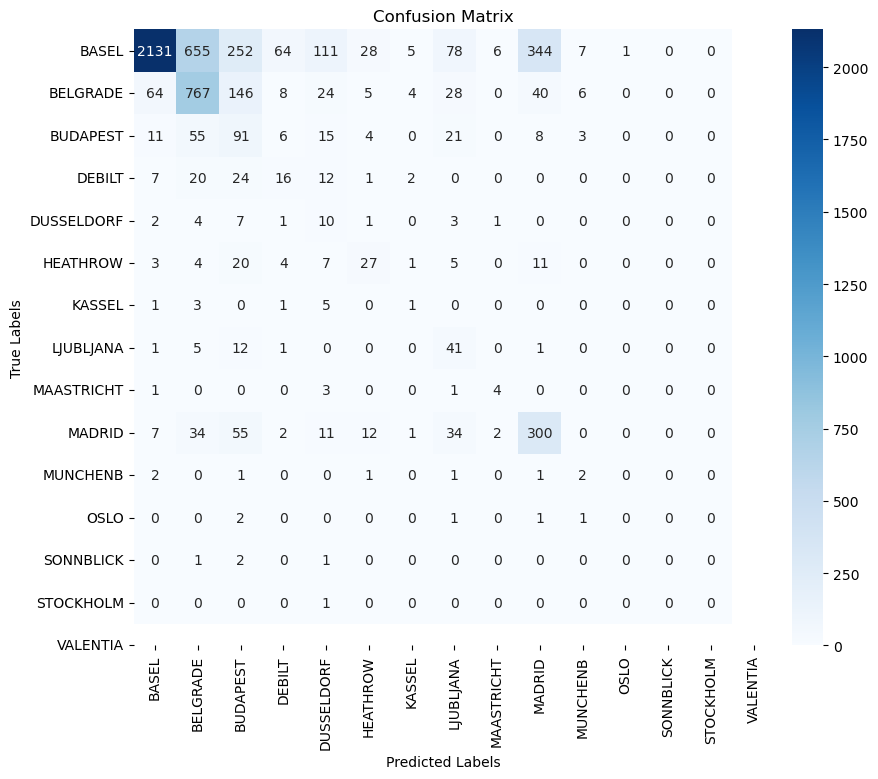

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as a heatmap with station labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=station_labels, yticklabels=station_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# 8th iteration- increasing number of filters and adding dropout layer

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Parameters
epochs = 50
batch_size = 32
n_filters = 64  # Increase initial filters
learning_rate = 0.0005

# Convert one-hot encoded y_train to integer class labels
y_train_labels = np.argmax(y_train, axis=1)

# Define classes and compute class weights
classes = list(np.unique(y_train_labels))
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weights_dict = dict(enumerate(class_weights))

# Model input dimensions based on X_train shape
timesteps = X_train.shape[1]
input_dim = X_train.shape[2]
n_classes = 15

# Define the updated model
model = Sequential()
model.add(Conv1D(n_filters, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(n_filters * 2, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))  # New dropout layer

model.add(Conv1D(n_filters * 4, kernel_size=2, activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_labels, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, np.argmax(y_test, axis=1)), class_weight=class_weights_dict, 
                    callbacks=[early_stopping])

# Evaluate model performance on the validation set
validation_loss, validation_accuracy = model.evaluate(X_test, np.argmax(y_test, axis=1))
print(f"Validation Loss: {validation_loss}, Validation Accuracy: {validation_accuracy}")

# Optional: Display model summary
model.summary()

Epoch 1/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3214 - loss: 2.6618 - val_accuracy: 0.4881 - val_loss: 1.3936
Epoch 2/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4338 - loss: 2.4366 - val_accuracy: 0.4322 - val_loss: 1.5046
Epoch 3/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4598 - loss: 2.1284 - val_accuracy: 0.4653 - val_loss: 1.3788
Epoch 4/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4761 - loss: 1.9575 - val_accuracy: 0.4610 - val_loss: 1.4089
Epoch 5/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4941 - loss: 2.1257 - val_accuracy: 0.4773 - val_loss: 1.3773
Epoch 6/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5026 - loss: 1.8526 - val_accuracy: 0.5373 - val_loss: 1.2383
Epoch 7/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5083 - loss: 2.2081 - val_accuracy: 0.4528 - val_loss: 1.5180
Epoch 8/50
538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4787 - loss: 2.3296 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 13, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 4, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 1, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,928 (1003.63 KB)

 Trainable params: 128,015 (500.06 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 128,017 (500.07 KB)

# 9th iteration- random oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Reshape X_train for oversampling (requires 2D format for sampling)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply Random Oversampling
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_flat, y_train_labels)

# Reshape X_train_resampled back to the original 3D shape
X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])

# Check the new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after oversampling:", dict(zip(unique, counts)))

Class distribution after oversampling: {0: 11084, 1: 11084, 2: 11084, 3: 11084, 4: 11084, 5: 11084, 6: 11084, 7: 11084, 8: 11084, 9: 11084, 10: 11084, 11: 11084, 13: 11084, 14: 11084}


In [46]:
# Retrain the model with the resampled data
history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, np.argmax(y_test, axis=1)), callbacks=[early_stopping])

# Evaluate model performance
validation_loss, validation_accuracy = model.evaluate(X_test, np.argmax(y_test, axis=1))
print(f"Validation Loss: {validation_loss}, Validation Accuracy: {validation_accuracy}")

Epoch 1/50
4850/4850 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7575 - loss: 0.8226 - val_accuracy: 0.6140 - val_loss: 1.4427
Epoch 2/50
4850/4850 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9127 - loss: 0.2610 - val_accuracy: 0.7020 - val_loss: 1.5056
Epoch 3/50
4850/4850 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9365 - loss: 0.1974 - val_accuracy: 0.6724 - val_loss: 1.7653
Epoch 4/50
4850/4850 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9474 - loss: 0.1635 - val_accuracy: 0.7102 - val_loss: 1.5766
Epoch 5/50
4850/4850 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.9546 - loss: 0.1452 - val_accuracy: 0.7205 - val_loss: 1.5771
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 1.4057
Validation Loss: 1.4427250623703003, Validation Accuracy: 0.6139770150184631


180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[2471  298  137  363   71   27    6   90   13  185   17    1    1    2]
 [  86  510  103  216   35   11    9   35    5   76    4    1    1    0]
 [   8   24   67   53   17    8    1   15    0   19    2    0    0    0]
 [   0    2    3   56   11    5    1    3    0    1    0    0    0    0]
 [   2    0    1   12   10    0    0    1    0    3    0    0    0    0]
 [   3    1    3   12    7   32    1    4    2   16    1    0    0    0]
 [   1    0    1    4    2    0    1    1    0    1    0    0    0    0]
 [   4    3    7    1    2    2    0   37    0    4    0    1    0    0]
 [   0    0    0    1    3    1    0    0    4    0    0    0    0    0]
 [  20   11   28    9   15   17    3   23    1  331    0    0    0    0]
 [   2    0    0    0    0    0    0    1    0    2    3    0    0    0]
 [   0    0    0    0    0    1    0    0    0    3    0    0    1    0]
 [   0    0    0    3    0    0    0    0    0    0    0    0   

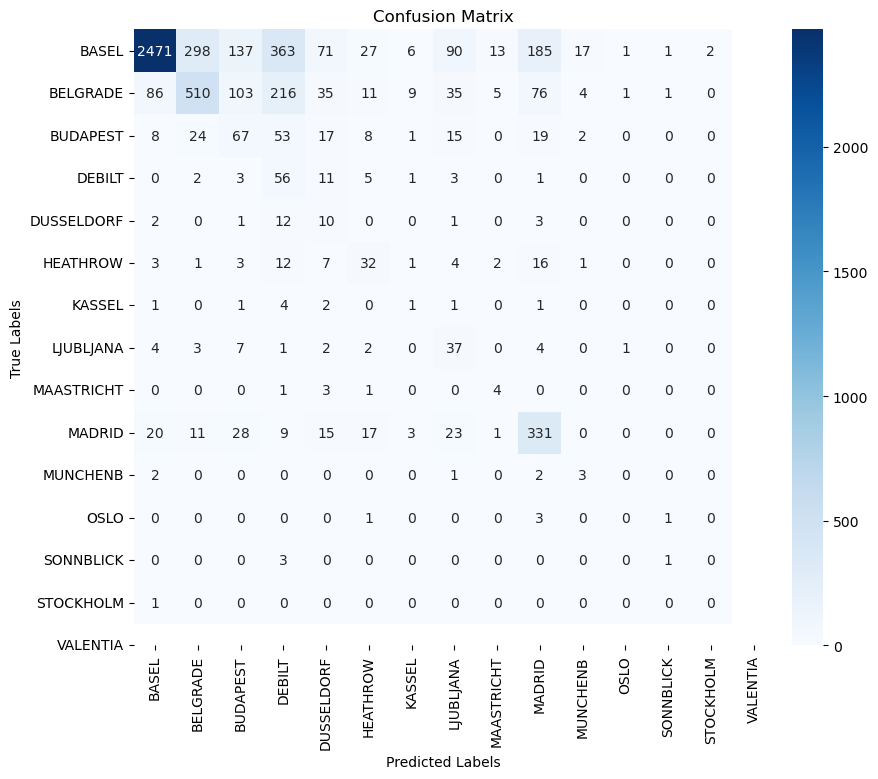

Unique classes in y_true: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]
Classification Report:
               precision    recall  f1-score   support

       BASEL       0.95      0.67      0.79      3682
    BELGRADE       0.60      0.47      0.53      1092
    BUDAPEST       0.19      0.31      0.24       214
      DEBILT       0.08      0.68      0.14        82
  DUSSELDORF       0.06      0.34      0.10        29
    HEATHROW       0.31      0.39      0.34        82
      KASSEL       0.05      0.09      0.06        11
   LJUBLJANA       0.18      0.61      0.27        61
  MAASTRICHT       0.16      0.44      0.24         9
      MADRID       0.52      0.72      0.60       458
    MUNCHENB       0.11      0.38      0.17         8
        OSLO       0.00      0.00      0.00         5
   STOCKHOLM       0.25      0.25      0.25         4
    VALENTIA       0.00      0.00      0.00         1

    accuracy                           0.61      5738
   macro avg       0.25      0.38      0

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 2: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualize Confusion Matrix as Heatmap with Station Labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=station_labels, yticklabels=station_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Step 3: Adjust Station Labels for Classification Report
# Find unique classes in y_true
unique_classes = np.unique(y_true)
print("Unique classes in y_true:", unique_classes)

# Filter station labels to match the unique classes in y_true
filtered_station_labels = [station_labels[i] for i in unique_classes]

# Generate the classification report using filtered labels
class_report = classification_report(y_true, y_pred_classes, target_names=filtered_station_labels)
print("Classification Report:\n", class_report)